In [1]:
from acip.acip import ACIP
from utils.utils_experiment import *
from utils.utils_visualization import *
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = 'spleen'
X, Y, gene_ids = load_data(dataset)
w = ACIP(X, config=dataset, verbose=False, col_ids=gene_ids)
w.flow()


****************************** Filtering genes *********************************
Keeping 1861 genes.

************************** Reducing dimensionality *****************************

******************* Getting explained variance using PCA. **********************
Ankle found at 12 components.
Used 12 components.

********************************* Clustering ***********************************
Trying n_clusters=4: 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

Clustering complete.
Highest score is achieved for n_clusters = 3

****************************** Finding Markers *********************************
Completed clusters:: 100%|██████████| 3/3 [00:13<00:00,  4.44s/it]



********************** Constructing visual embeddings. *************************


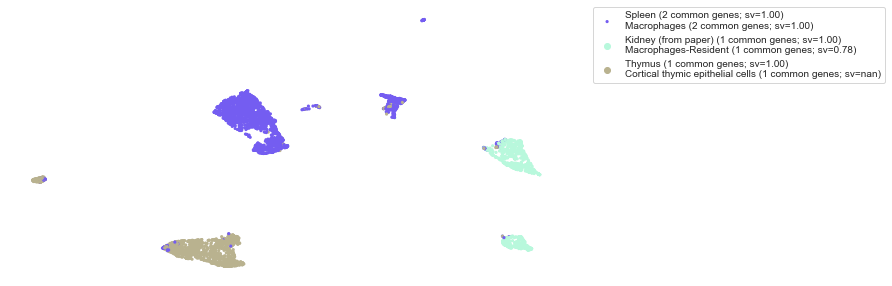

In [3]:
w.plot('2d')